# 사용 파이썬 점검

In [8]:
import sys
sys.version

'3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]'

In [9]:
import site
site.getsitepackages()

['c:\\Users\\102\\anaconda3', 'c:\\Users\\102\\anaconda3\\lib\\site-packages']

## 판다스로 구현하는 연령별 인구구조 유사지역

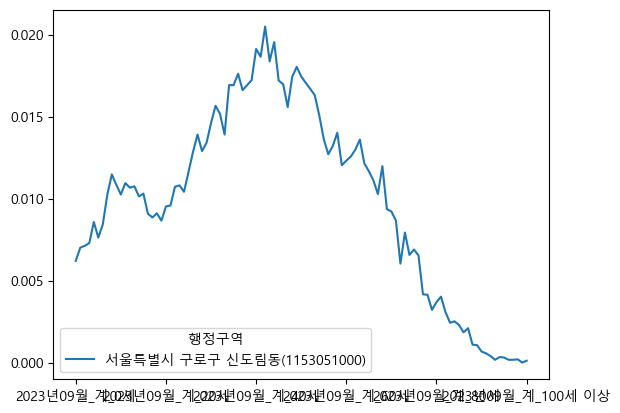

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('age.csv',encoding='cp949',index_col=0)
df=df.replace(',','',regex=True)

df=df.apply(pd.to_numeric)

df=df[df[df.columns[0]]!=0]

df=df.div(df['2023년09월_계_총인구수'],axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수']

name = input('원하는 지역의 이름을 입력해주세요: ')

a=df.index.str.contains(name)
df2=df[a]

plt.rcParams['font.family']='Malgun Gothic'
df2.T.plot()
plt.show()

In [5]:
x = df.sub(df2.iloc[0],axis='columns')
x.head(3)

,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,2023년09월_계_8세,2023년09월_계_9세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.002156,-0.002594,-0.002502,-0.002524,-0.003469,-0.002199,-0.002466,-0.003437,-0.004415,-0.003768,...,0.000396,0.000280,0.000411,0.000135,0.000028,0.000075,-0.000029,-0.000098,0.000075,0.000048
서울특별시 종로구 (1111000000),-0.003369,-0.003658,-0.003820,-0.003551,-0.004894,-0.003501,-0.003654,-0.004700,-0.005808,-0.004865,...,0.000670,0.000652,0.000618,0.000329,0.000200,0.000225,0.000090,-0.000046,0.000114,0.000167
서울특별시 종로구 청운효자동(1111051500),-0.003133,-0.003066,-0.003090,-0.003170,-0.004192,-0.003505,-0.001770,-0.002709,-0.003939,-0.003384,...,0.000670,0.000838,0.000447,0.000367,0.000044,0.000271,0.000096,-0.000108,0.000263,0.000152


In [6]:
import numpy as np

y=np.power(x,2)
z=y.sum(axis='columns')
z

행정구역
서울특별시  (1100000000)             0.000551
서울특별시 종로구 (1111000000)          0.001098
서울특별시 종로구 청운효자동(1111051500)     0.000512
서울특별시 종로구 사직동(1111053000)       0.000730
서울특별시 종로구 삼청동(1111054000)       0.001673
                                  ...   
제주특별자치도 서귀포시 서홍동(5013058000)    0.000644
제주특별자치도 서귀포시 대륜동(5013059000)    0.000337
제주특별자치도 서귀포시 대천동(5013060000)    0.000328
제주특별자치도 서귀포시 중문동(5013061000)    0.000305
제주특별자치도 서귀포시 예래동(5013062000)    0.002119
Length: 3862, dtype: float64

In [7]:
i=z.sort_values().index[:6]
i

Index(['서울특별시 구로구 신도림동(1153051000)', '경기도 하남시 (4145000000)',
       '경기도 남양주시 별내동(4136057000)', '서울특별시 영등포구 문래동(1156060500)',
       '충청남도 아산시 (4420000000)', '서울특별시 영등포구 신길제7동(1156069000)'],
      dtype='object', name='행정구역')

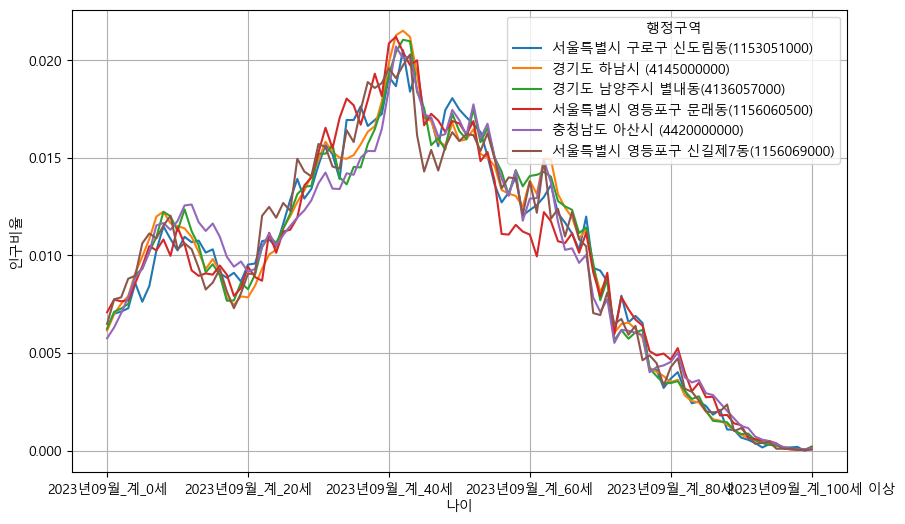

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
df.loc[i].T.plot(figsize=(10,6))
plt.xlabel('나이')
plt.ylabel('인구비율')
plt.grid(True)
plt.show()

# 2023-2 기말고사 힌트

In [10]:
'인천' in '경기도 인천시 남구'

True

In [11]:
'경기도 인천시 남구' in '인천'

False

In [12]:
import numpy as np
import pandas as pd

In [14]:
np.arange(1,5,0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [15]:
type(np.arange(1,5,0.5))

numpy.ndarray

In [18]:
s=pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

In [19]:
s=pd.Series(['1',2,3])
s

0    1
1    2
2    3
dtype: object

In [20]:
s[0:2]

0    1
1    2
dtype: object

In [21]:
s[2]

3

In [22]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [23]:
type(np.linspace(0,5,5))

numpy.ndarray

In [24]:
np.linspace(0,5,5)[-1]

5.0

# 난수

In [37]:
np.random.randint(3)

2

## pandas DataFrame

In [40]:
df = pd.DataFrame(np.arange(12).reshape(3,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [41]:
df.columns=list('ABCD')
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [42]:
df.index=list('abc')
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [47]:
df.iloc[1:,1]

b    5
c    9
Name: B, dtype: int32

In [45]:
type(df.iloc[1:,1])

pandas.core.series.Series

In [48]:
df.iloc[1:,1][0]

5

In [49]:
df.to_numpy()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [53]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [55]:
d=np.arange(10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
cond = d>5
cond

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [57]:
d[cond]

array([6, 7, 8, 9])

## map()

In [58]:
s = ['34','1999','2786','1000000']
result=map(int,s)
list(result)

[34, 1999, 2786, 1000000]

# scatter()

(0.0, 6.0)

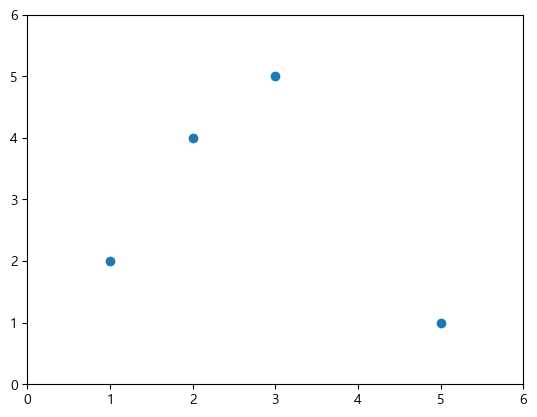

In [59]:
import matplotlib.pyplot as plt

x=[5,3,1,2]
y=[1,5,2,4]
plt.scatter(x,y)
plt.xlim(0,6)
plt.ylim(0,6)


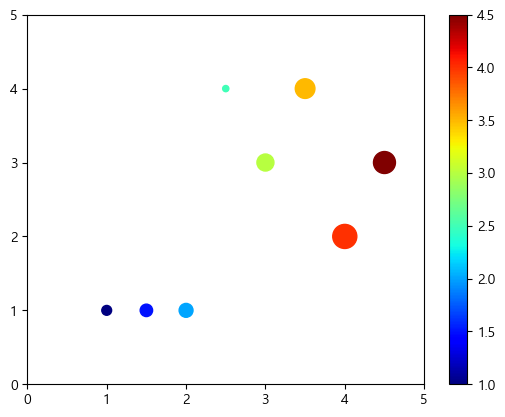

In [62]:
x=np.arange(1,5,.5)
y=np.random.randint(1,5,8)
size=[50,80,100,20,150,200,300,250]
plt.scatter(x,y,s=size,c=x,cmap='jet')
plt.xlim(0,5)
plt.ylim(0,5)
plt.colorbar()
plt.show()
